In [15]:
from keras import Sequential
from keras.layers import Input, Dense

from tensorflow import keras
from keras import layers

In [16]:
model = keras.Sequential([
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

In [18]:
model.build(input_shape=(None, 3))

In [19]:
model.weights

[<tf.Variable 'dense_13/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.16667223,  0.24276549,  0.04175246, -0.10422176,  0.1587035 ,
          0.18597755, -0.02819064,  0.03279719,  0.05909586, -0.18735036,
         -0.23804799, -0.17514473,  0.15965492, -0.22310399,  0.15664384,
          0.11652911, -0.18046734, -0.27406195, -0.2584923 ,  0.25077242,
          0.07977057,  0.10557544, -0.23351601,  0.05732018, -0.13431695,
          0.20698953,  0.21760845, -0.18384755,  0.17019716, -0.21445802,
         -0.2506769 ,  0.122971  ,  0.26572084, -0.0058656 ,  0.05985737,
         -0.04557702,  0.2554791 ,  0.28971338,  0.28005964,  0.27983105,
         -0.00632694, -0.25611016,  0.2247631 , -0.0147548 ,  0.03606257,
          0.08977011,  0.11121601, -0.15174821,  0.11716974, -0.2991465 ,
          0.07136762,  0.1704737 , -0.2090464 , -0.12389767,  0.12408331,
         -0.08860581,  0.19489515,  0.06114596,  0.21327436,  0.01860619,
          0.16089445, -0.22416128, -0.1737

아무것도 안했는데 가중치가 랜덤하게 들어가있다.

In [20]:
# 모델의 모습 살펴보기
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                256       
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


레이어 2개 

2개 다 댄스 레이어이다.

In [21]:
# 모델 이름 짓기
model.add(Dense(64, activation='relu', name='my_first_layer'))
model.add(Dense(10, activation='softmax', name='my_last_layer'))

In [22]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                256       
                                                                 
 dense_14 (Dense)            (None, 10)                650       
                                                                 
 my_first_layer (Dense)      (None, 64)                704       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 2,260
Trainable params: 2,260
Non-trainable params: 0
_________________________________________________________________


In [27]:
# 모델 새로 시작
model = Sequential()
model.add(Input(shape=(3,)))
model.add(Dense(64, activation='relu', name='my_first_layer'))
model.add(Dense(10, activation='softmax', name='my_last_layer'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


# 함수형 API

In [64]:
model = keras.Model()
x = Input(shape=(3,))
f = Dense(64, activation='relu')(x)
y = Dense(10, activation='softmax')(f)   # 이게 함수형 API 이다.

model = keras.Model(inputs=x, outputs=y)
model.summary()

Model: "model_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_33 (Dense)            (None, 64)                256       
                                                                 
 dense_34 (Dense)            (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


```
동일 코드

inputs = Input(shape = (3,))
y = Dense(64, activation='relu')(inputs)
outputs = Dense(10, activation='softmax')(y)
model = keras.Model(inputs=inputs, outputs=outputs)
```

## plot_model 함수 사용하기

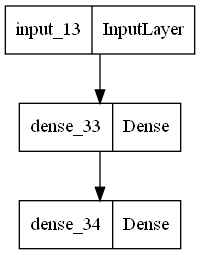

In [65]:
from keras.utils import plot_model
plot_model(model)

In [66]:
model.compile(optimizer='RMSprop', loss='MSE')

In [67]:
# fit 과정
from keras.datasets import mnist
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

In [68]:
train_data.shape

(60000, 28, 28)

In [69]:
train_data = train_data.reshape(60000, 28*28)
test_data = test_data.reshape(10000, 28*28)

In [70]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [71]:
model.fit(train_data, train_labels, epochs=10, batch_size=256)

Epoch 1/10


ValueError: in user code:

    File "C:\Users\admin\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\admin\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\admin\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\admin\anaconda3\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\admin\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\admin\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "model_15" is incompatible with the layer: expected shape=(None, 3), found shape=(None, 784)


In [ ]:
왜 함수형 쓰나?
시퀀셜에서 사용할 수 없었던걸 사요알 수 있는데
시퀀셜은 쌓기만 해서 입력되는 녀석이 1개고 출력되는 녀석이 1개일때만 사용가능
하지만 함수형은 입력 여러개 출력 여러개 일때도 사용이 가능

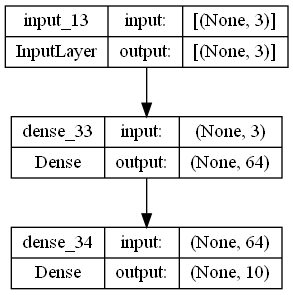

In [72]:
plot_model(model, show_shapes=True)

In [73]:
model.layers

3개의 layers가 있다.

In [75]:
model.layers[1].input

<KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'input_13')>

각층에서 벌어지는 일을 좀 더 자세하게 보여준다.

In [76]:
model.layers[1].output

<KerasTensor: shape=(None, 64) dtype=float32 (created by layer 'dense_33')>

# 다중 입력, 다중 출력 p251

In [78]:
# 모델

vocabulary_size = 10000
num_tags = 100
num_departments = 4

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags])
features = layers.Dense(64, activation="relu")(features)

priority = layers.Dense(1, activation="sigmoid", name="priority")(features)
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department]) 

In [80]:
# 모델 훈련

import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data]) 

40/40 [==============================] - 0s 5ms/step


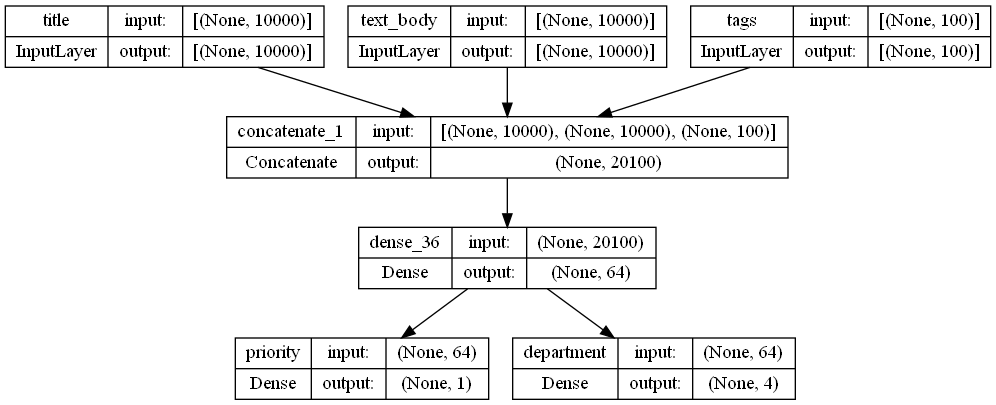

In [81]:
plot_model(model, show_shapes=True)